### Explanation of the parameters


***engine : str {'Comet', 'Tide', 'SpectraST'}, default 'Comet'***

It specifies the engine that was used to generate the pep.xml files.

***mode : str {'PSM', 'peptide'}, default 'PSM'***

Mode of the analysis for FDR estimation; can be PSM- or peptide-level.

***pos_tag : str, default None***

Tag to identify spectra coming from a file of positive samples; must be a unique string that is part of the file name.

***neg_tag : str, default None***

Tag to identify spectra coming from a file of negative samples; must be a unique string that is part of the file name.

***e_tag : str, default None***

Tag to identify spectra coming from a file of entrapment samples; must be a unique string that is part of the file name.

***ref_syn : str, default "pools.csv""***

Path of the csv file with peptide pool list used in ProteomeTools datasets.

***score : str, default 'xcorr'***

Score used as the basis for constructing the p-value distributions. Possible values for Comet ('xcorr', 'expect'), Tide ('exact-pvalue', 'refactored_xcorr', 'xcorr'), SpectraST ('dot', 'fval', 'p_value').

### Specify the parameters

In [15]:
ref_syn = '../pools_pep.csv'

positives_file = "../01625b_GB4-TUM_first_pool_26_01_01-3xHCD-1h-R1_twentysix_multiple_td.pep.xml"
negatives_file = "../01625b_GB6-TUM_first_pool_42_01_01-3xHCD-1h-R1_twentysix_multiple_td.pep.xml"
entrapments_file = "../Velos005137_twentysix_multiple_td.pep.xml"

engine = "Comet"
mode = "PSM"
pos_tag = 26
neg_tag = 42
etag = "Velos"

input_files = (positives_file, negatives_file, entrapments_file)
ratios = {"entrapment_ratio": 0,
          "decoy_ratio": 0}

### Run the analysis

In [17]:
import importlib as impl
import entrapment_processing as ep
impl.reload(ep)

# initialize
x = ep.CompareResults(input_files=input_files,
                      ref_syn=ref_syn, engine=engine, mode=mode, pos_tag=pos_tag,
                      neg_tag=neg_tag, etag=etag, ratios=ratios, score='expect')



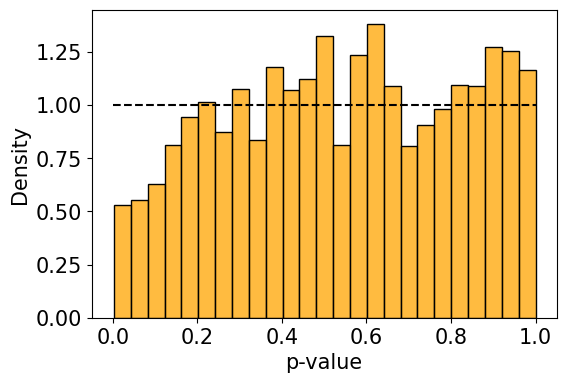

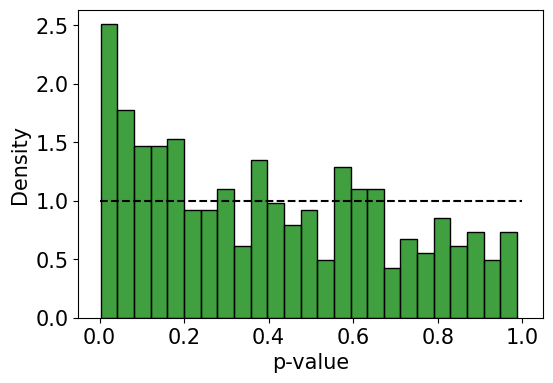

In [20]:
# run the analysis
#x.run_analysis()
x.evaluate_plot_pvalues(outname="test") # produces two plots: one for decoys (orange), one for entrapments (green)